# Unsupervised learning using K-Means clusters

## Classifying Iris flowers into clusters representing species

## Objectives

On completing this assignment, you will be able to write a simple AI application involving unsupervised learning using K-Means clusters.

## Discussion

Previously, we trained our learning algorithms with the use of labels in the data using supervised learning. However, at times, we have data without labels that needs classifying. In these situations, we may use unsupervised learning. 

Unsupervised learning is the process of training algorithms without the use of labels. In unsupervised learning, algorithms try to classify data in subgroups using some underlying similarity metric among data items. Often, they try to find clusters in the data on some similarity measures. One of commonly used clustering algorithm is K-Means clustering. It assumes that the number of clusters are known before hand and relies on Euclidean distance between data points to form clusters. The algorithm is outlined below.

Step 1. The initial position of cluster centers (centroids) are randomly selected.

Step 2. Each data point is assigned to the centroid nearest to it. 

Step 3, Once, each point is assigned to a centroid, a new position for each centroid is calculated based on the average distance of its members. (This potentially changes distance between points and different cluster centers.)

The steps 2 and 3 are repeated till in step 3, the position of centroids do not change. At  that points, all centroid (cluster center) positions are fixed, and all data points are grouped into into the desired clusters.

## Assignment Description

Write an AI application which, when provided with sepal lengths and widths of a set of iris flowers belonging to three different species will classify them into three different clusters predicting different species using KMeans from klearns.cluster module. 

You will be provided with a file named IRIS.csv containing labeled data for 150 Iris flowers of three different species containing their sepal lengths, sepal widths, petal lengths, petal widths, and species name. You will provide the KMeans only the sepal lengths and sepal widths and ask it to divide the data into three clusters. You will check the clusters data against the labeled species data for a match and report the following:

- total number of data items used
- number of items successfully classified by KMeans
- accuracy score
- classification report
- confusion matrix
- Graphically show all data items as points in a scatter graph in three different colors with each color representing a cluster.
- Also, graphically show all data items as points in a scatter graph in three different colors with each color representing a species according to the labels in the data.

Additionally do the following:

- Write code that will perform supervised learning with KNeighborsClassifier (n-neighbors=5) classifier of sklearn.neighbors module with the same data using sepal_length and sepal_width columns as features and species column as labels. Use 80% of the data for training and 20% for testing and produce accuracy score.
- Compare the accuracy score of KMeans and KNeighborsClassifier


## 

## Model to be used

KMeans from sklearn.cluster module

## Submittal

The uploaded submittal should contain the following:

- jpynb file after running the application from start to finish containinarked source code, output, and your interaction- matching html filefile.

## Coding

Follow the steps below.ps).


Turn off all the warning messages

In [24]:
import warnings
warnings.filterwarnings ('ignore')

Read the data set from a file into a pandas data frame

In [26]:
import pandas as pd
df = pd.read_csv ('IRIS.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


Check for null or missing entries and if present remove the rows containing them.

In [28]:
df.isna().sum ().sum ()

0

In [29]:
df=df.dropna()
df.isna().sum ().sum ()

0

List all the species and their value counts

In [32]:
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Filter out the colums that will be used as features

In [34]:
df_features = df.filter(['sepal_length','sepal_width'],axis=1)
df_features.head(3)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


- Create a KMeans object for forming 3 clusters (because we know there are three categories of species in the data.
- Train KMeans on data created above containing two features but no labels as it is unsupervised learning.
- By default, KMeans assigns cluster numbers (cluster id's) to clusters at random. So, each time we run the application, the same clusters may get different cluster id's (cluster numbers). When we assign a value to random_state and pass it to KMeans at object creation, it seeds the random generator. By assigning the same value this parameter at each run, we ensure that the same clusters will be assigned the same customer number (cluster ids) at each run. This ensures consistent and repeatable application behavior. 

In [36]:
from sklearn.cluster import KMeans
model = KMeans (n_clusters = 3 , random_state=0)
model = model.fit (df_features)

  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


- During training, as mentioned above, KMeans divides the data into clusters (subgroups) and assigns a cluster number (cluster id) to each cluster. Simultaneously, it assigns each data item to a cluster and assigns all cluster members, the parent cluster number (cluster id) as their predicted label. So, all data item belonging to cluster number 2, will have the 2 as their predicted label. Below, after the model is trained we acquire the predicted labels of all data items from KMeans model and display them as a list. 


In [38]:
predicted_labels = model.labels_

print (predicted_labels)
type(predicted_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


numpy.ndarray

Note that above,
- First several items are are assigned 2 as their predicted label as they are assigned to cluster number 2. In other words, KMeans is predicting that these data items have similar features and they are classified to the same species. The actual labels indicate that they belonging to species 'Iris-setosa'. So, KMeans is encoding 2 for species 'Iris-setosa'.
- Similarly, many of last items are assigned 1 as their predicted label as they are assigned to cluster number 1. In other words, KMeans is predicting that these data items have similar features and they are classified to the same species. The actual label values indicate that they belonging to species 'Iris-virginica'. So, KMeans is encoding 1 for species 'Iris-virginica'. K
- Similarly, KMeans is encoding 0 for species Iris-versicolor'.

In summary, from the above discussion, we assumes the following encoding for the above data:

  2 : 'Iris-setosa'
  
  0 : 'Iris-virginica'
  
  1 : 'Iris-versicolor'
  


From KMeans model, we acquire the positions of cluster centers (centroids) and print them below.

In [41]:
predicted_centers = model.cluster_centers_

print (predicted_centers)

[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.418     ]]


Below, we filter out the actual label from main data frame and display a few of them.

In [43]:
df_true_labels = df.filter(['species'], axis=1)

print(type(df_true_labels))
print(df_true_labels.shape)
print(df_true_labels)


<class 'pandas.core.frame.DataFrame'>
(150, 1)
            species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In the next few steps, we will display the actual labels for the data items, first as strings and then in encoded form to compare them with the predicted label values above obtained from the model.
- Encode the labels with 0, 1, and 2 as below using the ordinal decoder. We use the ordinal encoder because it allows us to chose the encoding assignment which label encoder does not.
- Below we chose the encoding assignment using the variable maplist. According to ordinal encoder rules, the first name in the list will be encoded zero, the second as 1, and the third as 2, and so on.
- We listed the name such that they would get the same encoding as they got in predicted labels above (according to our conjecture mentioned above)

In [45]:

from sklearn.preprocessing import OrdinalEncoder

# Below, listed values will be encoded as 0, 1, 2 respectively. 
maplist=['Iris-versicolor','Iris-virginica','Iris-setosa']

oe = OrdinalEncoder(categories=[maplist])

'''
Below, the method expects the parameter passed to be 2 dimensional. It also returns 
a 2 dimensional value. However, since the receiving variable is 1 dimensional, it 
automatically gets converted into 1 dimensional 
'''
df_true_labels.species = oe.fit_transform(df_true_labels)

print (df_true_labels.species[0:5])
print (type(df_true_labels.species))

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: species, dtype: float64
<class 'pandas.core.series.Series'>


Convert the the above Series object into array.

In [47]:
ar_true_labels = df_true_labels.species.values

print (ar_true_labels)
type (ar_true_labels)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


numpy.ndarray

When we visually compare the above true labels with the earlier predicted label, the values are fairly close.

Below, we display the following:
- the total number of items
- the total number of matches
- the accuracy score
- classification report
- confusion matrix

In [50]:
from sklearn.metrics import accuracy_score, classification_report,\
                            confusion_matrix
print(ar_true_labels.sum())
print (accuracy_score(ar_true_labels,predicted_labels,\
                      normalize=False))
print (accuracy_score(ar_true_labels,predicted_labels))
print (classification_report(ar_true_labels,predicted_labels))
confusion_matrix(ar_true_labels,predicted_labels)

150.0
123
0.82
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74        50
         1.0       0.74      0.70      0.72        50
         2.0       1.00      1.00      1.00        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



array([[38, 12,  0],
       [15, 35,  0],
       [ 0,  0, 50]])

In [51]:
ar_features = df_features.values
print(ar_features[0:5,0:2])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


Below, we graphically show all data items as points in a scatter graph.
- with sepal length of the data items along x-axis and their sepal width along y-axis.
- colors of data points are chosen from the color map: rainbow
- color value of each data point is specified by a number in the list: predicted_labels
- numbers in the predicted_labels list are 0, 1, 2. So, each data point is in one of these three colors.
- the numbers in the predicted_labels list are in fact the cluster numbers to which the data points belong. So all the data points belonging to the same cluster are in the same color. But, each cluster represents a predicted species. So all data point that are of the same color are in the same predicted species

Below, we also show cluster centers (centroids) as black X's.  

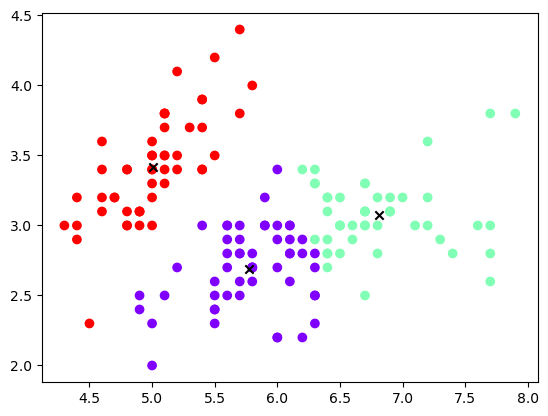

In [53]:
import matplotlib.pyplot as plt

plt.scatter (ar_features[:, 0], ar_features [: ,1], c=predicted_labels, cmap='rainbow')
plt.scatter (predicted_centers[:,0],predicted_centers[:,1], c='black', marker='x' )

Below, we graphically show all data items as points in a scatter graph in the same way as we did in the graph above. The only difference is that the color values for points are chosen from the array list ar_true_labels which are encoded values (0, 1, or 2) for species. So, all the data points belonging to the same species are in the same color.  

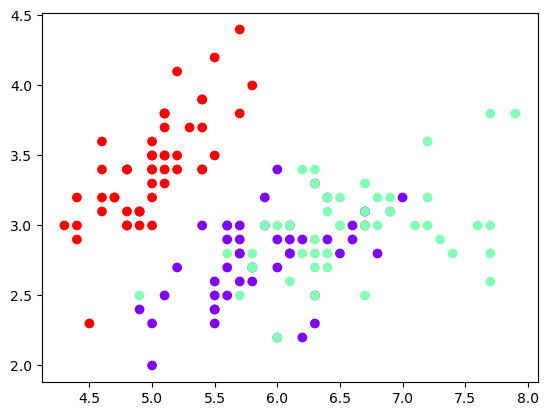

In [55]:

plt.scatter ( ar_features [: , 0], ar_features [: ,1], c=ar_true_labels, cmap='rainbow')


Above, both graphs show the same data point where each point represents a data item in the data set. In the first graph, the colors of the data points are according to values (0, 1, or 2) contained in predicted_labels. In the second graph, the colors of the data points are according to values (0, 1, or 2) in the ar_true_labels. So, by examining the two graphs, we can see how well the three clusters formed by KMeans match the three species. 